In [12]:
import sys
import os

sys.path.append('../../src/')

from numpy import sin
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import pandas as pd
from matplotlib import pyplot, pyplot as plt
import seaborn as sns
from numpy import sin

from utils.utils import train_data, plot_results

In [13]:
name = "sin(100 * x)"
function_to_approximate = lambda x: sin(100 * x)

In [14]:
X_train, y_train = train_data(start=0, end=0.8, number=10000, f=function_to_approximate)

X_train_prepared = []
y_train_prepared = []
for i in range(100, len(X_train)):
    X_train_prepared.append(y_train[i - 100:i])
    y_train_prepared.append(y_train[i])
y_train_prepared = np.array(y_train_prepared)
X_train_prepared = np.array(X_train_prepared)
X_train_prepared = np.reshape(X_train_prepared, (9900, 100, 1))

In [15]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(100, 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
regressor.fit(X_train_prepared, y_train_prepared, epochs=15, batch_size=128)

Epoch 1/15
78/78 [==============================] - 4s 14ms/step - loss: 0.0309
Epoch 2/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 3/15
78/78 [==============================] - 1s 13ms/step - loss: 0.0030
Epoch 4/15
78/78 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 5/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0026
Epoch 6/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 7/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0028
Epoch 8/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0025
Epoch 9/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0023
Epoch 10/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0023
Epoch 11/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0022
Epoch 12/15
78/78 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 13/15
78/78 [==================

In [17]:
X_test, y_test = train_data(start=0, end=1.0, number=10000, f=function_to_approximate)
X_test_prepared = []
y_test_prepared = []
for i in range(100, len(X_train)):
    X_test_prepared.append(y_test[i - 100:i])
    y_test_prepared.append(y_test[i])
y_test_prepared = np.array(y_test_prepared)
X_test_prepared = np.array(X_test_prepared)
X_test_prepared = np.reshape(X_test_prepared, (9900, 100, 1))

mean_absolute_error = regressor.evaluate(X_test_prepared, y_test_prepared)

310/310 [==============================] - 2s 5ms/step - loss: 5.6261e-04


In [18]:
y_predicted = regressor.predict(X_test_prepared)

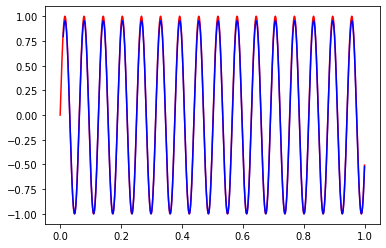

In [24]:
X_to_plot = []
y_to_plot = []
for i in range(0, len(X_test_prepared)):
    X_to_plot.append(X_test_prepared[i][len(X_test_prepared[i]) - 1][0])

grid = np.linspace(0, 1.0, 10000)
sns.lineplot(x=grid, y=function_to_approximate(grid), color="red")
sns.lineplot(x=grid[100:], y=y_predicted.flatten(), color="blue")
plt.show()